In [2]:
import os
import scoring
import numpy as np
import pandas as pd
from ggplot import *
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

dirs = next(os.walk('.'))[1]
dirs = [x for x in dirs if not x.startswith('.')]

res = {}
gs = {}

episodes = {}
rewards = {}

count = 0
for d in dirs:
    try:
        res[d] = scoring.score_from_local(d)
        eplens = res[d]['episode_lengths']
        eprews = res[d]['episode_rewards']
        timestamps = res[d]['timestamps']
        irt = res[d]['initial_reset_timestamp']
        buckets = 100
        gs[d] = scoring.compute_graph_stats(eplens, eprews, timestamps, irt, buckets)
        episodes[d] = gs[d]['x_episode_y_reward']['y']
        rewards[d] = gs[d]['x_episode_y_reward']['y'] + np.random.normal(10, 10, len(gs[d]['x_episode_y_reward']['y']))
        count += 1
    except Exception as e:
        print('Error', e, d)
        pass

a = pd.DataFrame.from_dict(rewards)
groupMean = a.mean(axis=1)
groupStd = a.std(axis=1)
eps = a.index

print(dirs)
a.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['test1', 'test2', 'test3']


,test1,test2,test3
0,35.625615,30.483058,42.188404
1,33.132241,24.682274,28.460413
2,22.946903,39.846852,27.107491
3,26.869794,30.388670,12.478362
4,29.021093,30.806949,57.188158


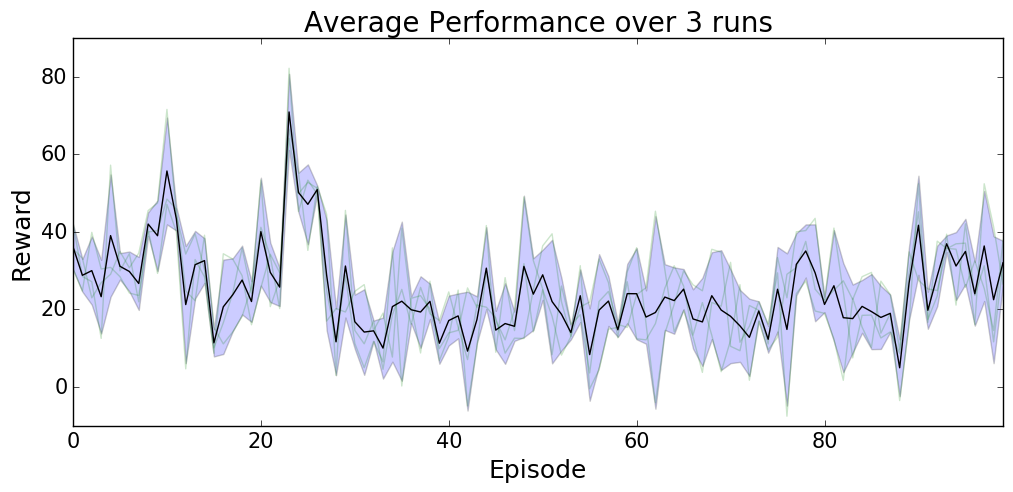

In [4]:
ax = a.plot(color='green', legend=False, alpha=0.2)
ax.set_title('Average Performance over ' + str(count) + ' runs', fontsize=20)
plt.plot(eps, groupMean, "k")
plt.fill_between(eps, groupMean+groupStd, groupMean-groupStd, facecolor='blue', alpha=0.2)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
ax.set_xlabel('Episode', fontsize=18)
ax.set_ylabel('Reward', fontsize=18)
plt.show()